In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime


from wrangle import wrangle

In [47]:
df = wrangle()

In [80]:
cohort_names = list(df.name.unique())

cohort_df = pd.DataFrame(columns=['cohort','program','during', 'after', 'total', 'class_size',
                                  'low_access_during', 'low_access_percent', 'java_i',
                                 'java_ii', 'mysql', 'html_css', 'jquery', 'fundamentals', 'sql', 'classification'])

for program in list(df.program.unique()):
    for value in list(df[df.program == program].name.unique()):
        cohort = df[df.name == value]
        startstamp = cohort.start_date.value_counts().index[0]
        endstamp = cohort.end_date.value_counts().index[0]
        program = program
        total = len(cohort[cohort.request_date_time >= startstamp])
        during = len(cohort[cohort.request_date_time <= endstamp])
        after = len(cohort[cohort.request_date_time > endstamp])
        class_size = cohort.user_id.nunique()
        
        temp = cohort[cohort.request_date_time <= endstamp]
         
        low_access_during = len(temp.groupby('user_id').path.count()[temp.groupby('user_id').path.count() < 40])
        
    
        java_i = (temp.url=='java-i').sum()
        java_ii = (temp.url=='java-ii').sum()
        mysql = (temp.url== 'mysql').sum()
        html_css = (temp.url== 'html-css').sum()
        jquery = (temp.url== 'jquery').sum()
        
        fundamentals = (temp.url=='fundamentals').sum()
        sql = (temp.url=='sql').sum()
        classification = (temp.url=='classification').sum()
        
        cohort_df = cohort_df.append({'cohort':value, 'program':program, 'during': during, 'after':after, 'total':total,
                                      'class_size':class_size, 'low_access_during':low_access_during, 'java_i':java_i,
                                     'java_ii':java_ii, 'mysql':mysql, 'html_css':html_css, 'jquery':jquery,
                                      'fundamentals':fundamentals, 'sql':sql, 'classification':classification},  ignore_index=True)
    
cohort_df['low_access_percent'] = round(((cohort_df.low_access_during/cohort_df.class_size)*100).astype('float'))

In [81]:
cohort_df

,cohort,program,during,after,total,class_size,low_access_during,low_access_percent,java_i,java_ii,mysql,html_css,jquery,fundamentals,sql,classification
0,Hampton,php,0,1502,1502,5,0,0.0,0,0,0,0,0,0,0,0
1,Arches,php,0,8264,8264,18,0,0.0,0,0,0,0,0,0,0,0
2,Quincy,php,0,1086,1086,16,0,0.0,0,0,0,0,0,0,0,0
3,Kings,php,0,2626,2626,9,0,0.0,0,0,0,0,0,0,0,0
4,Lassen,php,0,9462,9462,12,0,0.0,0,0,0,0,0,0,0,0
5,Glacier,php,0,547,547,6,0,0.0,0,0,0,0,0,0,0,0
6,Denali,php,0,3,3,1,0,0.0,0,0,0,0,0,0,0,0
7,Joshua,php,0,294,294,5,0,0.0,0,0,0,0,0,0,0,0
8,Olympic,php,0,4705,4705,13,0,0.0,0,0,0,0,0,0,0,0
9,Badlands,php,0,76,76,3,0,0.0,0,0,0,0,0,0,0,0


In [69]:
java_df = cohort_df[cohort_df.program == 'java']
ds_df = cohort_df[cohort_df.program == 'ds']

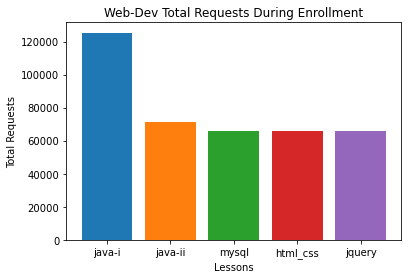

In [89]:
plt.bar('java-i', java_df.java_i.sum())
plt.bar('java-ii', java_df.java_ii.sum())
plt.bar('mysql', java_df.mysql.sum())
plt.bar('html_css', java_df.mysql.sum())
plt.bar('jquery', java_df.mysql.sum())
plt.ylabel('Total Requests')
plt.xlabel('Lessons')
plt.title('Web-Dev Total Requests During Enrollment')
plt.show()

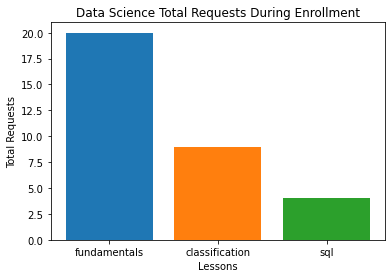

In [90]:
plt.bar('fundamentals', ds_df.java_i.sum())
plt.bar('classification', ds_df.java_ii.sum())
plt.bar('sql', ds_df.mysql.sum())

plt.ylabel('Total Requests')
plt.xlabel('Lessons')
plt.title('Data Science Total Requests During Enrollment')
plt.show()

In [5]:
during_dict = {}
after_dict = {}
for value in list(df.name.unique()):
    cohort = df[df.name == value]
    endstamp = cohort.end_date.value_counts().index[0]
    
    during_dict[value] = cohort[cohort.request_date_time <= endstamp]
    after_dict[value] = cohort[cohort.request_date_time > endstamp]

In [6]:
during_dict.keys()

dict_keys(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles', 'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali', 'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike', 'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos', 'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna', 'Easley', 'Marco', 'Florence', 'Neptune', 'Oberon'])

### #1 Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [ ]:
java_name_list = list(df[df.program == 'java'].name.unique())
ds_name_list = list(df[df.program == 'ds'].name.unique())
php_name_list = list(df[df.program == 'php'].name.unique())
fe_name_list = list(df[df.program == 'fe'].name.unique())

In [35]:
list(df.program.unique())

['php', 'java', 'fe', 'ds']

In [ ]:
df_url = pd.DataFrame(columns=['cohort','during', 'after', 'total', 'class_size'])

In [62]:
for program in list(df.program.unique()):
    for value in list(df[df.program == program].name.unique()):
        
        print(program + " "+ value)
        print((during_dict[value].url=='java-i').sum())
        print(during_dict[value].url.value_counts().head(5))
    

php Hampton
0
Series([], Name: url, dtype: int64)
php Arches
0
Series([], Name: url, dtype: int64)
php Quincy
0
Series([], Name: url, dtype: int64)
php Kings
0
Series([], Name: url, dtype: int64)
php Lassen
0
Series([], Name: url, dtype: int64)
php Glacier
0
Series([], Name: url, dtype: int64)
php Denali
0
Series([], Name: url, dtype: int64)
php Joshua
0
Series([], Name: url, dtype: int64)
php Olympic
0
Series([], Name: url, dtype: int64)
php Badlands
0
Series([], Name: url, dtype: int64)
php Ike
0
Series([], Name: url, dtype: int64)
php Franklin
0
Series([], Name: url, dtype: int64)
java Teddy
5135
java-i      5135
mysql       3934
java-ii     3356
spring      2491
java-iii    2344
Name: url, dtype: int64
java Sequoia
108
spring      989
appendix    220
mysql       214
html-css    157
java-i      108
Name: url, dtype: int64
java Niagara
0
Series([], Name: url, dtype: int64)
java Pinnacles
0
Series([], Name: url, dtype: int64)
java Mammoth
0
Series([], Name: url, dtype: int64)
java Uly

In [64]:
df[df.name == 'Olympic'].url.value_counts().head(5)

content     1359
java-i      1317
java-ii      543
html-css     375
jquery       332
Name: url, dtype: int64

    Answered on final

### #2 Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [7]:
# What are the top

df[(df.program == 'php')].url.value_counts(dropna=False).sort_values(ascending=False).head(7)

content     6397
java-i      5164
java-ii     2977
html-css    2463
spring      2324
mysql       2067
java-iii    1953
Name: url, dtype: int64

In [8]:
# What are the top

df[df.program == 'ds'].url.value_counts(dropna=False).sort_values(ascending=False).head(7)

fundamentals         16691
sql                  13670
classification       11840
python               10455
regression            7507
stats                 6660
anomaly-detection     4332
Name: url, dtype: int64

#### Top 4 Web Dev lessons
    java-i
    java-ii
    html-css
    mysql
#### Top 4 Data Science lessons
    fundamentals
    sql
    classification
    python

In [9]:
java_name_list = list(df[df.program == 'java'].name.unique())
ds_name_list = list(df[df.program == 'ds'].name.unique())
php_name_list = list(df[df.program == 'php'].name.unique())
fe_name_list = list(df[df.program == 'fe'].name.unique())

In [10]:
web_dev4 = ['java-i','java-ii','html-css','mysql','java-iii']
ds_4 = ['fundamentals','sql','classification','python']

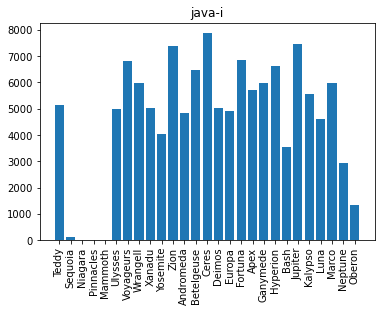

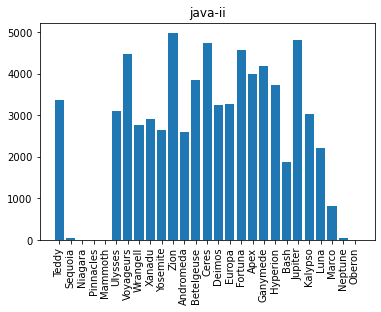

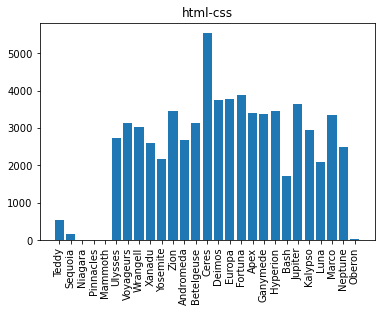

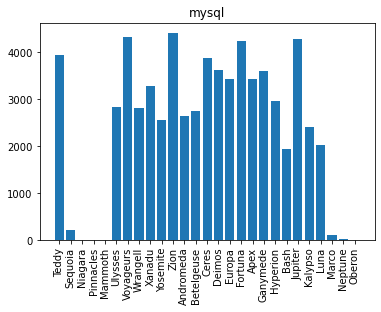

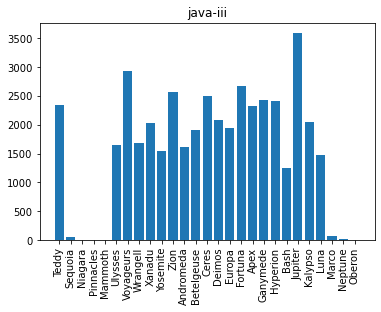

In [11]:
# For Webdev
temp =[]
for lesson in web_dev4:
    for value in java_name_list:
        
        temp.append((during_dict[value].url == lesson).sum())
        
    plt.bar(java_name_list, temp)
    plt.xticks(rotation = 90)
    plt.title(lesson)
    plt.show()
    temp=[]

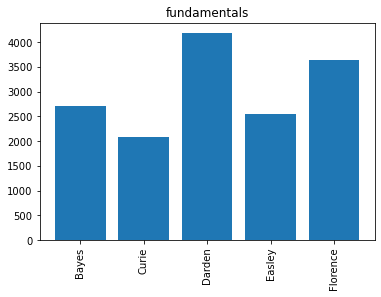

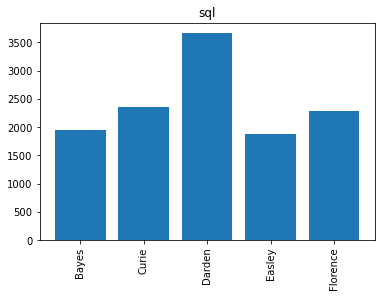

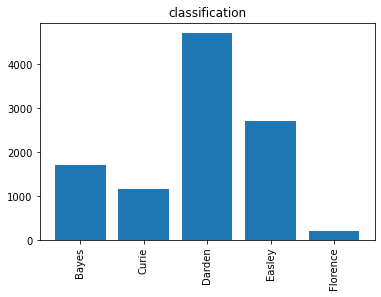

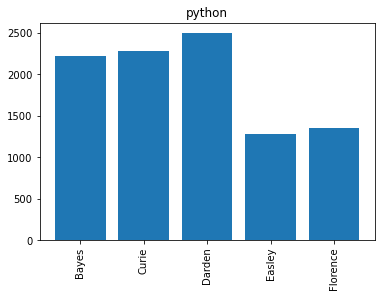

In [12]:
# For Webdev
temp =[]
for lesson in ds_4:
    for value in ds_name_list:
        
        temp.append((during_dict[value].url == lesson).sum())
        
    plt.bar(ds_name_list, temp)
    plt.xticks(rotation = 90)
    plt.title(lesson)
    plt.show()
    temp=[]

### #3 Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [13]:
df = wrangle()

In [14]:
during_dict = {}
after_dict = {}
for value in list(df.name.unique()):
    cohort = df[df.name == value]
    endstamp = cohort.end_date.value_counts().index[0]
    
    during_dict[value] = cohort[cohort.request_date_time <= endstamp]
    after_dict[value] = cohort[cohort.request_date_time > endstamp]

In [15]:
java_name_list = list(df[df.program == 'java'].name.unique())
ds_name_list = list(df[df.program == 'ds'].name.unique())
php_name_list = list(df[df.program == 'php'].name.unique())
fe_name_list = list(df[df.program == 'fe'].name.unique())

In [16]:
during_dict['Teddy'].groupby('user_id').path.count()[during_dict['Teddy'].groupby('user_id').path.count() < 75]

user_id
46    51
Name: path, dtype: int64

<AxesSubplot:>

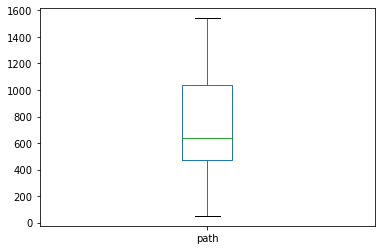

In [17]:
during_dict['Teddy'].groupby('user_id').path.count().plot.box()

### #4 Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [18]:
df = wrangle()

In [19]:
df.head()

,path,user_id,ip,name,start_date,end_date,created_at,updated_at,program,request_date_time,date_year,date_month,date_weekday,hour,url,lesson
1,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018-01-26 09:56:02,2018,January,Friday,9,java-ii,no data
2,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018-01-26 09:56:05,2018,January,Friday,9,java-ii,object-oriented-programming
3,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018-01-26 09:56:06,2018,January,Friday,9,slides,object_oriented_programming
4,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,2018-01-26 09:56:24,2018,January,Friday,9,java-i,conditionals
5,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,2018-01-26 09:56:41,2018,January,Friday,9,java-i,loops


In [20]:
df = df.set_index('request_date_time').sort_index()

In [21]:
df.head()

,path,user_id,ip,name,start_date,end_date,created_at,updated_at,program,date_year,date_month,date_weekday,hour,url,lesson
request_date_time,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,January,Friday,9,java-ii,no data
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,January,Friday,9,java-ii,object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,January,Friday,9,slides,object_oriented_programming
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,2018,January,Friday,9,java-i,conditionals
2018-01-26 09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,2018,January,Friday,9,java-i,loops


In [22]:
cohort_requests = df.groupby('name').resample('D').size().unstack(0)
cohort_requests.head()

name,Andromeda,Apex,Apollo,Arches,Badlands,Bash,Bayes,Betelgeuse,Ceres,Curie,...,Pinnacles,Quincy,Sequoia,Teddy,Ulysses,Voyageurs,Wrangell,Xanadu,Yosemite,Zion
request_date_time,,,,,,,,,,,,,,,,,,,,,
2018-01-26,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,158.0,301.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-27,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,126.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-28,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,27.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,272.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-30,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,17.0,132.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
cohort_names = list(cohort_requests.columns)

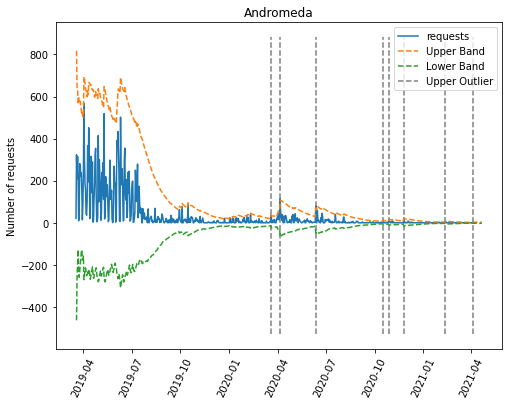

Andromeda
                       s    midband          ub         lb
request_date_time                                         
2020-03-20          36.0   5.353926   34.627894 -23.920043
2020-04-06         115.0  20.229295  108.160035 -67.701445
2020-06-12          80.0  10.797665   70.658642 -49.063312
2020-10-17          11.0   1.386170   10.765548  -7.993207
2020-10-28          15.0   1.941392   14.570560 -10.687775
2020-11-25          22.0   2.144701   19.597033 -15.307631
2021-02-11           6.0   0.590540    5.744873  -4.563792
2021-04-05           3.0   0.224856    2.817665  -2.367954


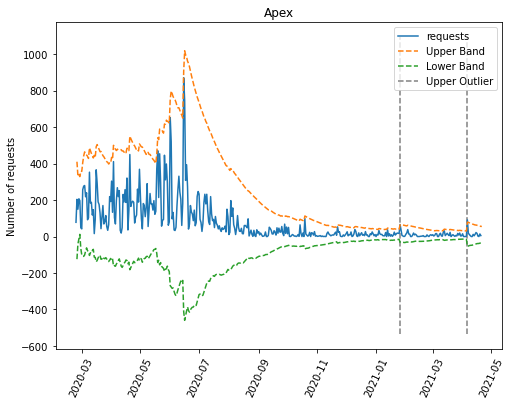

Apex
                      s    midband         ub         lb
request_date_time                                       
2021-01-26         66.0  15.965354  64.106383 -32.175675
2021-04-06         91.0  12.540441  79.315616 -54.234734


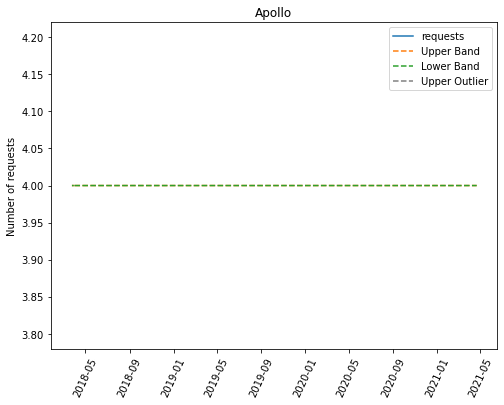

Apollo
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


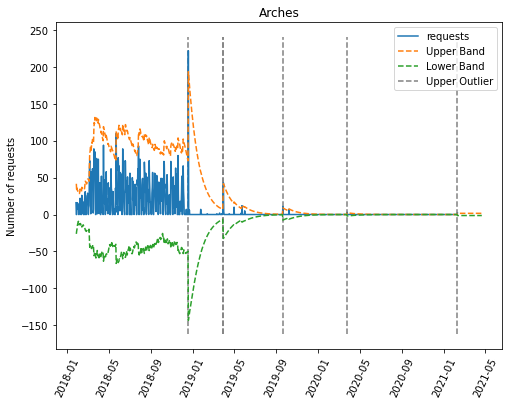

Arches
                       s    midband          ub          lb
request_date_time                                          
2018-12-19         222.0  25.113401  193.662473 -143.435671
2019-03-30          28.0   2.073119   23.862999  -19.716760
2019-03-31          43.0   4.713563   41.934244  -32.507118
2019-09-20          11.0   0.710292    8.959211   -7.538628
2020-03-25           3.0   0.193557    2.442524   -2.055411
2021-02-09           2.0   0.129032    1.628252   -1.370187


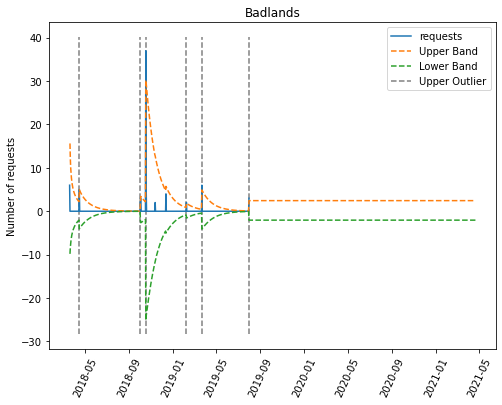

Badlands
                      s   midband         ub         lb
request_date_time                                      
2018-04-15          5.0  0.457172   4.962305  -4.047961
2018-10-02          3.0  0.193553   2.442430  -2.055323
2018-10-17         37.0  2.534361  30.222396 -25.153674
2019-02-07          2.0  0.136723   1.839666  -1.566220
2019-03-22          6.0  0.394866   4.905637  -4.115904
2019-07-31          3.0  0.193612   2.443168  -2.055945


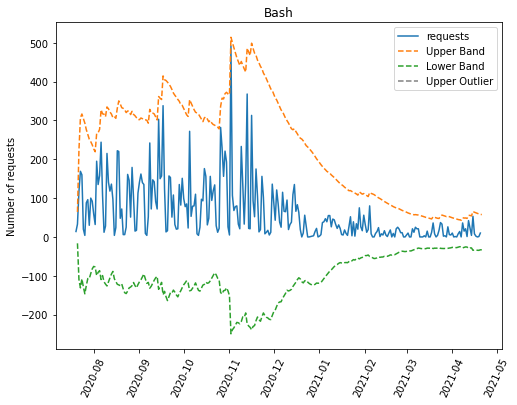

Bash
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


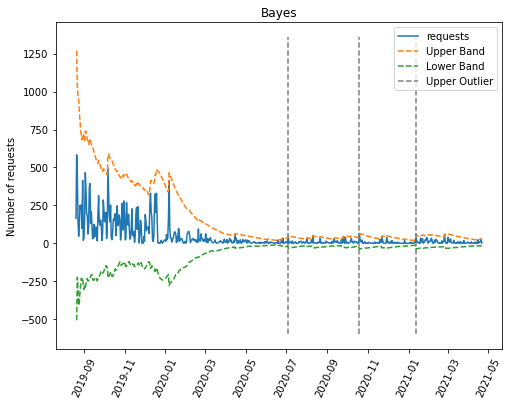

Bayes
                      s    midband         ub         lb
request_date_time                                       
2020-07-04         51.0   8.820489  50.721356 -33.080377
2020-10-19         65.0  11.688102  62.524330 -39.148126
2021-01-12         60.0   6.426980  51.979158 -39.125198


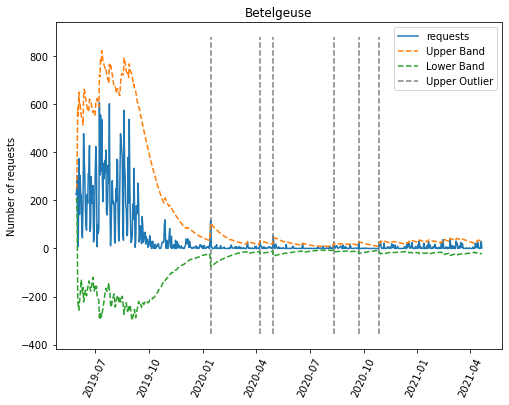

Betelgeuse
                       s    midband          ub         lb
request_date_time                                         
2020-01-14         116.0  15.464011  105.065708 -74.137686
2020-04-07          32.0   4.164114   30.996448 -22.668220
2020-04-30          51.0   6.299617   45.086627 -32.487393
2020-08-11          22.0   2.600976   20.242526 -15.040574
2020-09-23          30.0   3.726437   27.875347 -20.422473
2020-10-28          25.0   2.084853   22.220755 -18.051049


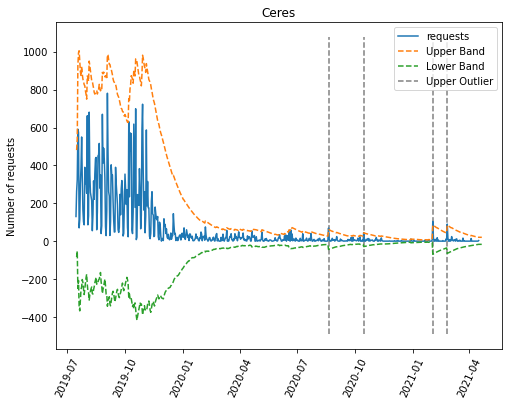

Ceres
                       s   midband         ub         lb
request_date_time                                       
2020-08-20          69.0  8.648457  61.488368 -44.191454
2020-10-15          45.0  7.671657  44.198766 -28.855452
2021-02-02         104.0  7.781547  85.196078 -69.632984
2021-02-25          90.0  9.597033  84.689396 -65.495330


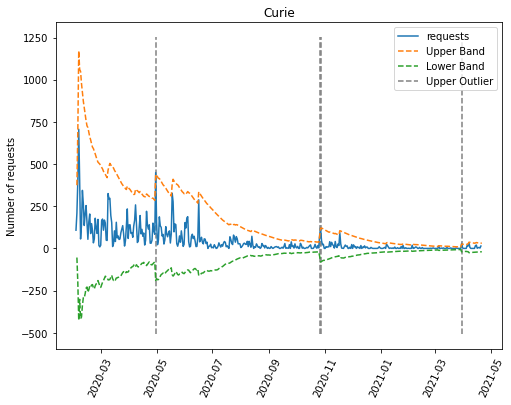

Curie
                       s     midband          ub          lb
request_date_time                                           
2020-04-30         449.0  124.606097  439.317700 -190.105506
2020-10-26          80.0   13.040360   73.389962  -47.309243
2020-10-27         122.0   20.070014  120.460588  -80.320560
2021-03-30          30.0    2.763683   25.751927  -20.224561


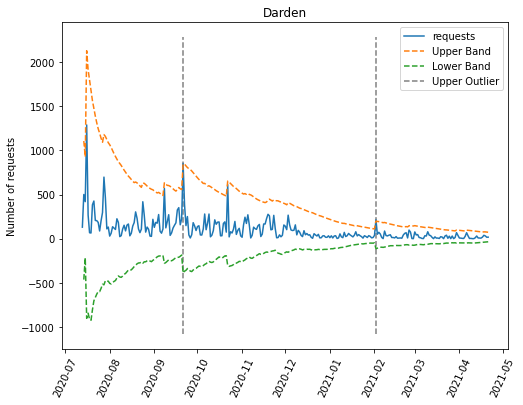

Darden
                       s     midband          ub          lb
request_date_time                                           
2020-09-21         851.0  228.467257  844.978378 -388.043864
2021-02-02         213.0   43.009877  199.308252 -113.288497


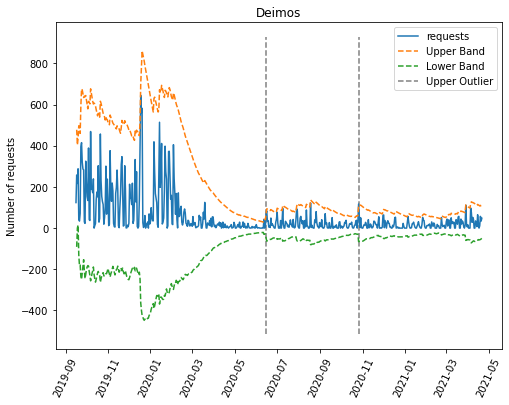

Deimos
                       s    midband          ub         lb
request_date_time                                         
2020-06-15          68.0  10.122568   67.374241 -47.129104
2020-10-26         117.0  22.027251  109.509379 -65.454876


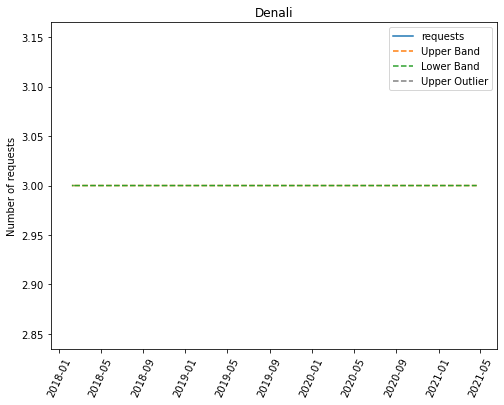

Denali
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


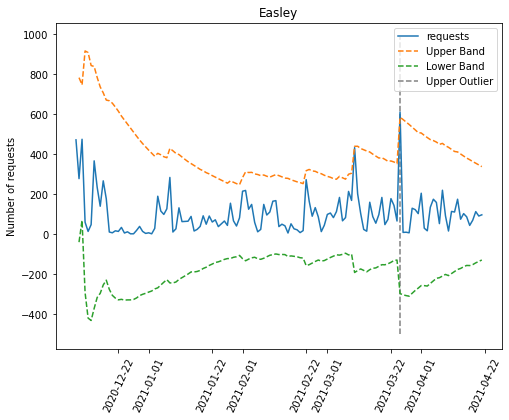

Easley
                       s    midband          ub          lb
request_date_time                                          
2021-03-25         610.0  142.98049  584.029247 -298.068267


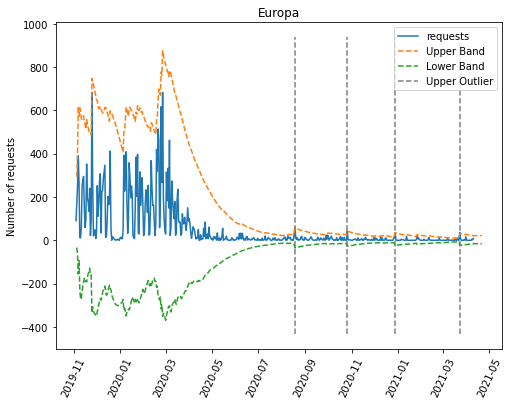

Europa
                      s    midband         ub         lb
request_date_time                                       
2020-08-18         58.0  10.288824  55.882481 -35.304832
2020-10-26         43.0   7.750837  42.331517 -26.829844
2020-12-28         35.0   5.696528  34.821716 -23.428660
2021-03-23         36.0   3.709284  31.273522 -23.854953


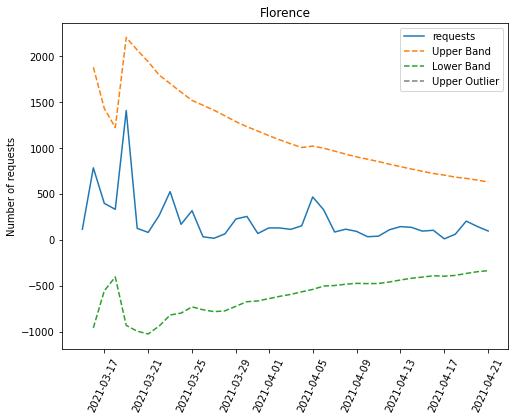

Florence
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


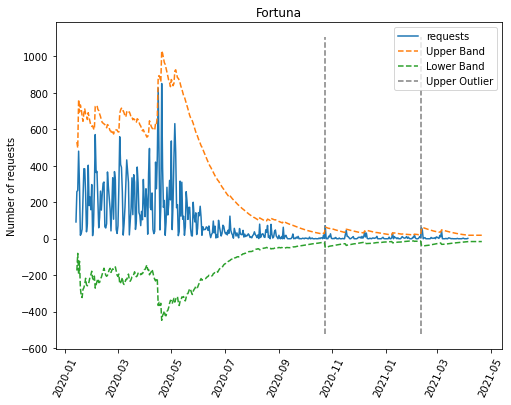

Fortuna
                      s   midband         ub         lb
request_date_time                                      
2020-10-24         71.0  8.403521  64.158774 -47.351733
2021-02-11         59.0  8.465287  52.363336 -35.432763


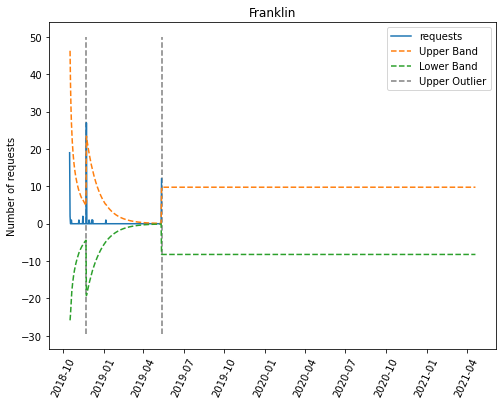

Franklin
                      s   midband         ub         lb
request_date_time                                      
2018-11-23         27.0  2.109783  23.432314 -19.212749
2019-05-12         12.0  0.774237   9.769835  -8.221362


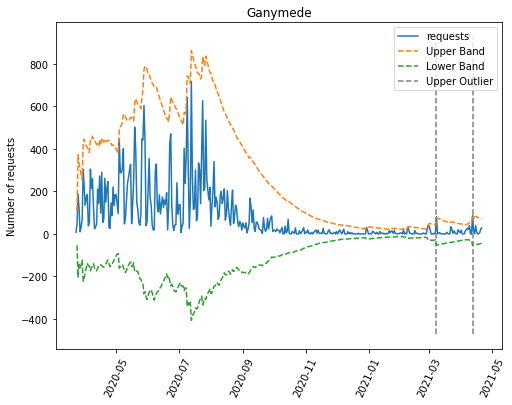

Ganymede
                      s    midband         ub         lb
request_date_time                                       
2021-03-08         81.0  12.074747  76.943597 -52.794103
2021-04-12         87.0  15.668672  85.199796 -53.862452


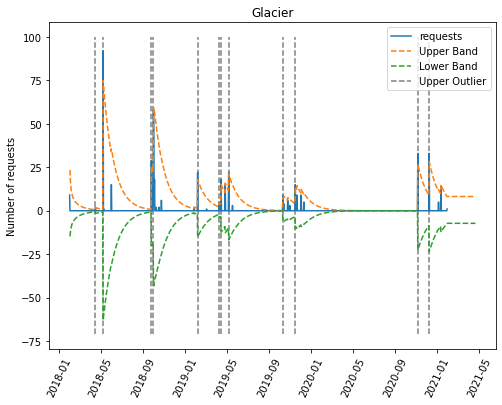

Glacier
                      s   midband         ub         lb
request_date_time                                      
2018-04-16          2.0  0.133779   1.740539  -1.472981
2018-05-08         92.0  5.974802  74.968852 -63.019247
2018-09-25         29.0  1.871923  23.621502 -19.877656
2018-10-01         58.0  5.869337  52.065044 -40.326371
2019-02-06         22.0  1.488099  17.983116 -15.006919
2019-04-09          5.0  0.352245   4.665085  -3.960595
2019-04-15         18.0  1.397372  15.169705 -12.374960
2019-05-07         22.0  2.238276  21.248161 -16.771608
2019-10-11          9.0  0.580720   7.328028  -6.166588
2019-11-16         15.0  1.310187  12.866209 -10.245835
2020-11-05         33.0  2.129032  26.866152 -22.608087
2020-12-08         33.0  2.364743  28.335564 -23.606077


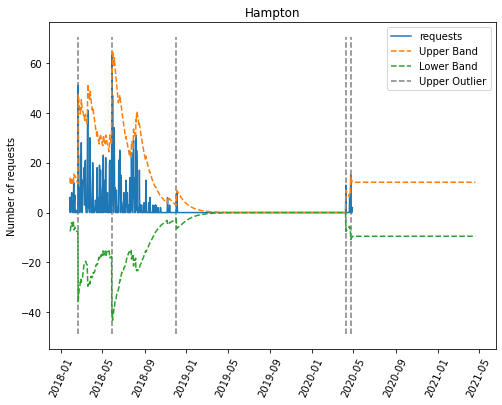

Hampton
                      s   midband         ub         lb
request_date_time                                      
2018-02-20         51.0  5.858167  47.336341 -35.620008
2018-05-29         63.0  8.575018  57.290714 -40.140678
2018-12-03          6.0  0.578761   5.682899  -4.525377
2020-04-09         11.0  0.709677   8.955384  -7.536029
2020-04-23         15.0  1.676544  14.220761 -10.867673


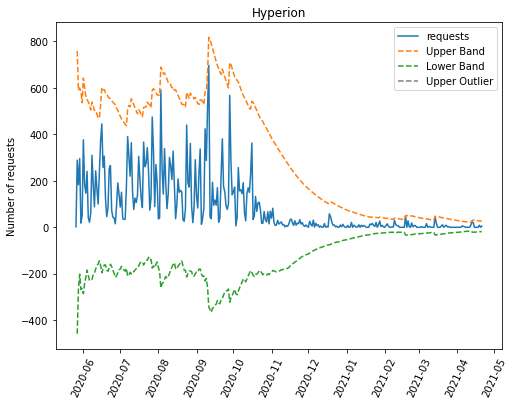

Hyperion
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


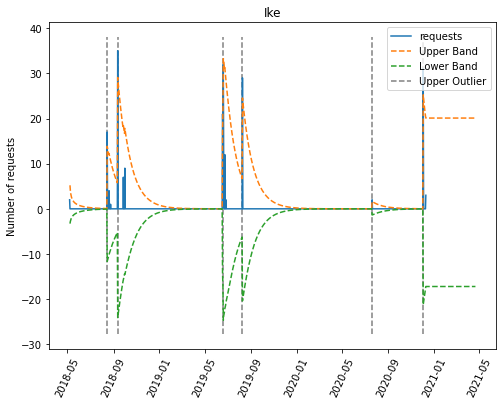

Ike
                      s   midband         ub         lb
request_date_time                                      
2018-08-15         17.0  1.098242  13.849169 -11.652684
2018-09-12         35.0  2.501868  29.086796 -24.083061
2019-06-18         21.0  1.354839  17.096642 -14.386965
2019-08-10         29.0  2.077039  24.541878 -20.387799
2020-07-20          2.0  0.129032   1.628252  -1.370187
2020-12-03         31.0  2.000015  25.237909 -21.237879


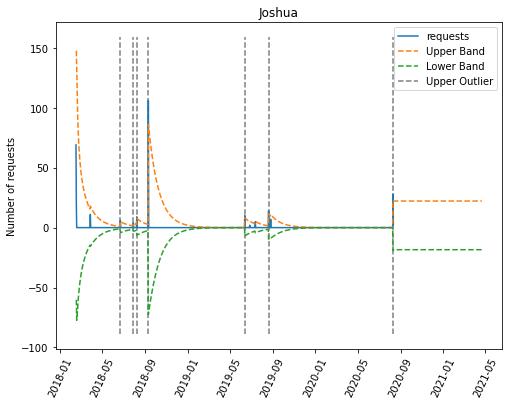

Joshua
                       s   midband         ub         lb
request_date_time                                       
2018-06-22           6.0  0.390688   4.983717  -4.202341
2018-07-29           4.0  0.291189   3.566897  -2.984518
2018-08-08           9.0  0.730113   7.773151  -6.312924
2018-09-10         106.0  6.919548  86.351068 -72.511971
2019-06-13          10.0  0.645161   8.141263  -6.850940
2019-08-20          14.0  0.939254  11.494738  -9.616230
2020-08-10          28.0  1.806452  22.795523 -19.182619


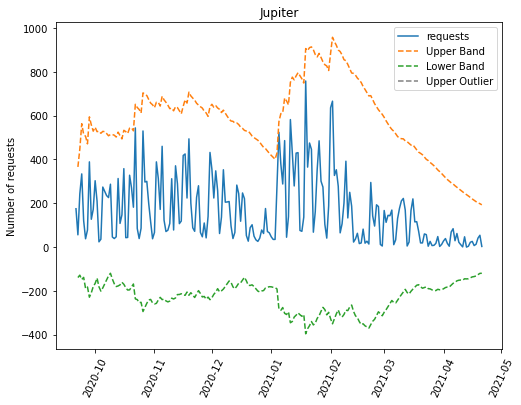

Jupiter
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


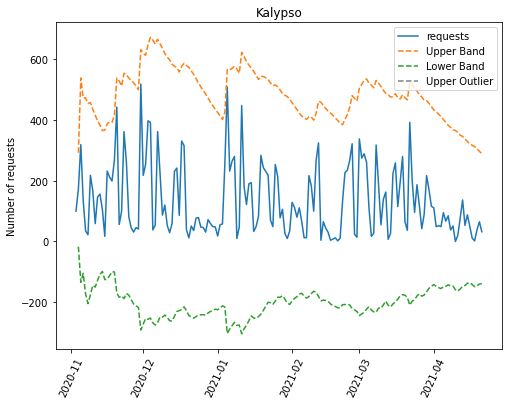

Kalypso
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


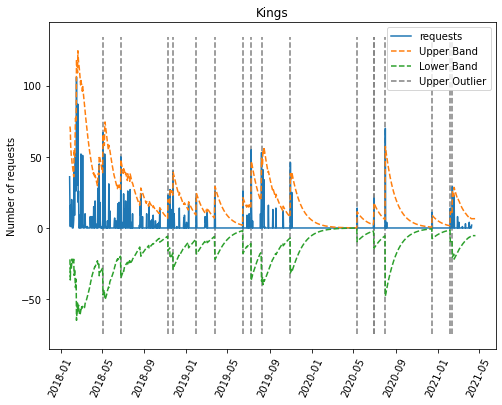

Kings
                      s   midband         ub         lb
request_date_time                                      
2018-05-04         67.0  9.396493  65.789306 -46.996320
2018-06-25         50.0  6.426228  47.955850 -35.103395
2018-11-09         23.0  1.924901  19.866163 -16.016362
2018-11-24         40.0  5.135271  39.290412 -29.019870
2019-01-30         21.0  1.867802  19.287511 -15.551908
2019-03-25         24.0  1.976022  20.716145 -16.764100
2019-06-15         26.0  1.693313  21.259100 -17.872474
2019-07-09         55.0  4.908521  46.804445 -36.987403
2019-08-08         53.0  5.824881  49.072200 -37.422439
2019-10-31         46.0  3.312965  38.256114 -31.630183
2020-05-12         14.0  0.903239  11.397972  -9.591494
2020-06-29          4.0  0.294839   3.981950  -3.392272
2020-06-30         21.0  1.630656  17.555875 -14.294563
2020-08-02         70.0  4.696664  57.315251 -47.921924
2020-12-16         11.0  0.710257   8.976312  -7.555799
2021-02-07         14.0  0.923943  11.5028

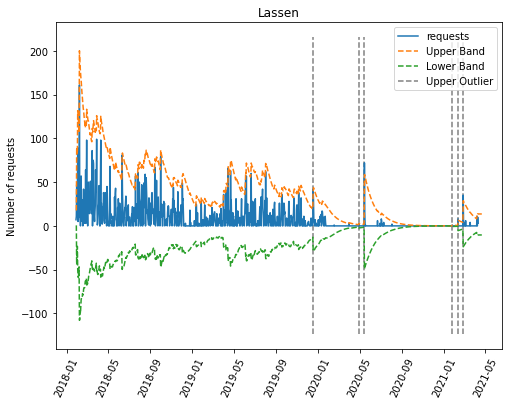

Lassen
                      s   midband         ub         lb
request_date_time                                      
2019-12-18         42.0  5.726583  38.782237 -27.329071
2020-04-29          3.0  0.230163   2.807811  -2.347485
2020-05-15         72.0  4.780801  58.669976 -49.108373
2021-01-25          1.0  0.064520   0.814298  -0.685259
2021-02-11          8.0  0.536893   6.532922  -5.459136
2021-02-26         35.0  2.455503  28.797277 -23.886271


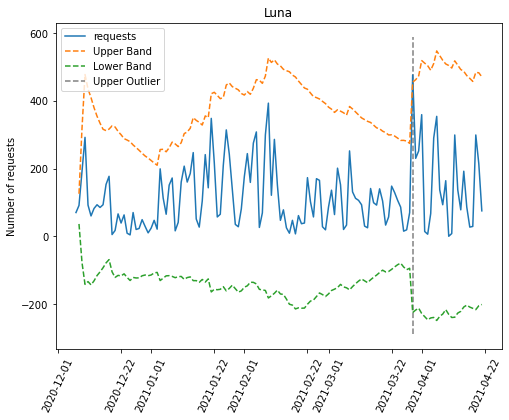

Luna
                       s     midband          ub         lb
request_date_time                                          
2021-03-29         476.0  114.753543  454.776556 -225.26947


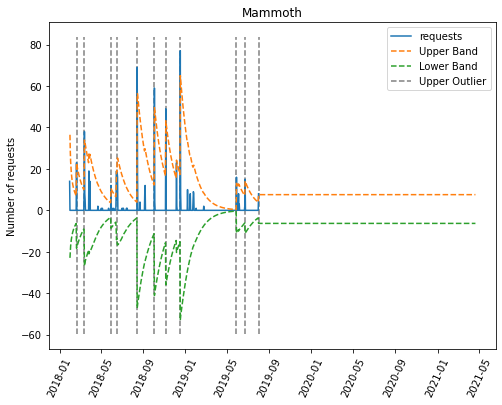

Mammoth
                      s   midband         ub         lb
request_date_time                                      
2018-02-19         23.0  2.285030  22.871346 -18.301285
2018-03-14         38.0  3.491442  33.881858 -26.898975
2018-05-30         12.0  0.904805  10.435481  -8.625871
2018-06-15         19.0  2.266065  18.744048 -14.211918
2018-08-14         69.0  4.576281  56.332573 -47.180010
2018-10-03         59.0  4.244570  49.572005 -41.082865
2018-11-05         49.0  3.661760  43.216040 -35.892519
2018-12-17         77.0  5.968931  65.011981 -53.074119
2019-05-29         16.0  1.033138  13.030950 -10.964674
2019-06-23         15.0  1.542107  14.123646 -11.039433
2019-08-01          8.0  0.630556   7.568108  -6.306995


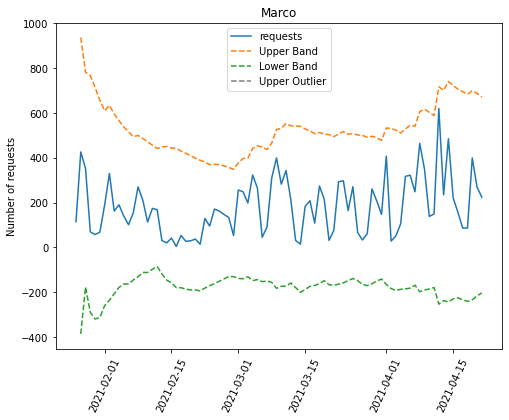

Marco
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


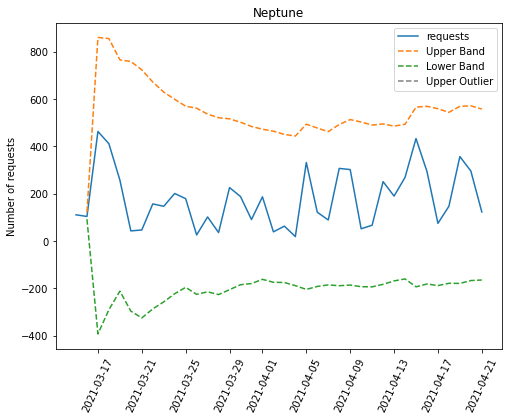

Neptune
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


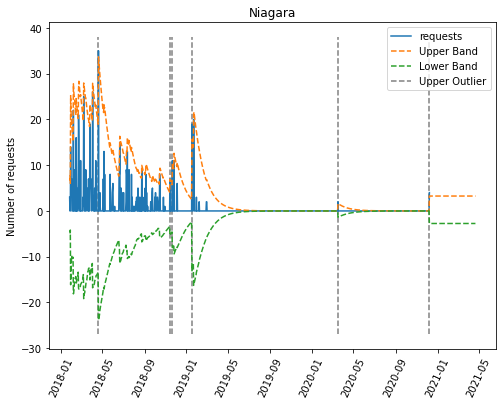

Niagara
                      s   midband         ub         lb
request_date_time                                      
2018-04-20         35.0  4.885321  33.670026 -23.899383
2018-11-14          7.0  0.784396   6.944135  -5.375344
2018-11-21         11.0  1.247700  10.521207  -8.025806
2019-01-17         19.0  1.297805  15.681808 -13.086198
2020-03-17          2.0  0.129032   1.628252  -1.370187
2020-12-08          4.0  0.258065   3.256503  -2.740374


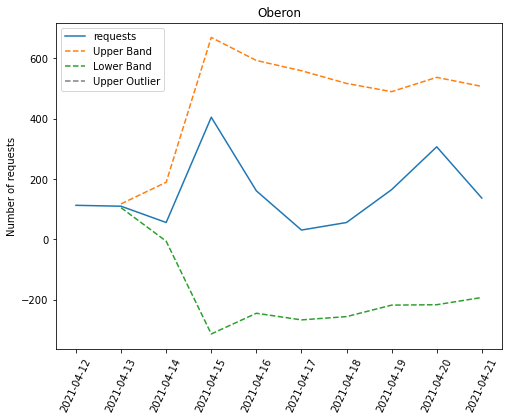

Oberon
Empty DataFrame
Columns: [s, midband, ub, lb]
Index: []


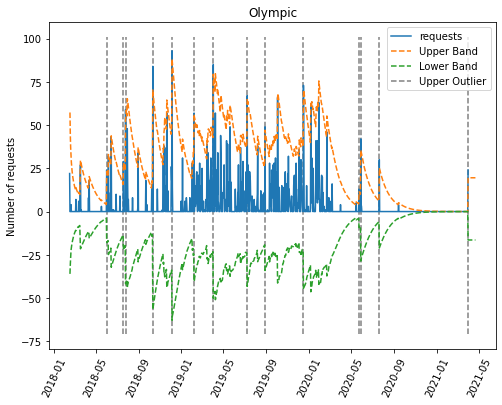

Olympic
                      s    midband         ub         lb
request_date_time                                       
2018-06-01         24.0   1.702948  19.983268 -16.577372
2018-07-19         29.0   2.906731  28.137215 -22.323753
2018-07-25         59.0   5.754665  53.315284 -41.805954
2018-10-11         84.0   6.793912  70.317770 -56.729945
2018-12-05         93.0  12.698117  88.300001 -62.903767
2019-02-06         57.0   7.965407  56.365346 -40.434531
2019-04-02         85.0  14.656788  79.449412 -50.135835
2019-07-08         67.0  10.718304  64.741068 -43.304460
2019-08-28         49.0   6.459705  47.048136 -34.128726
2019-12-16         73.0  11.828915  68.767237 -45.109407
2020-05-23         13.0   1.069282  11.441621  -9.303057
2020-05-28         42.0   3.475757  35.597486 -28.645973
2020-07-20         30.0   2.051367  25.187473 -21.084739
2021-03-31         24.0   1.548388  19.539021 -16.442245


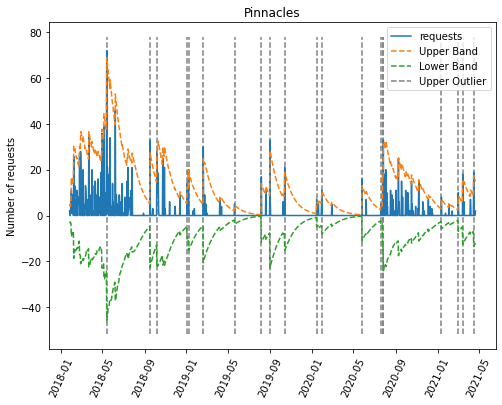

Pinnacles
                      s    midband         ub         lb
request_date_time                                       
2018-05-14         72.0  11.605887  69.017807 -45.806033
2018-09-17         33.0   2.325651  27.382221 -22.730920
2018-10-07         28.0   2.578805  26.926751 -21.769140
2019-01-03         14.0   1.138164  12.524285 -10.247956
2019-01-07         20.0   2.161989  19.634063 -15.310086
2019-02-19         30.0   2.109972  24.919000 -20.699057
2019-05-21          5.0   0.377742   4.579787  -3.824302
2019-08-07         17.0   1.098854  13.844652 -11.646944
2019-09-01         33.0   2.655235  28.227117 -22.916648
2019-10-14         21.0   1.863314  18.928852 -15.202223
2020-01-15          7.0   0.455386   5.761711  -4.850940
2020-01-30         11.0   1.317251  10.681040  -8.046539
2020-05-26         16.0   1.033708  13.029838 -10.962422
2020-07-20          5.0   0.374632   4.768950  -4.019686
2020-07-25         20.0   1.558725  16.803955 -13.686505
2020-07-27         33

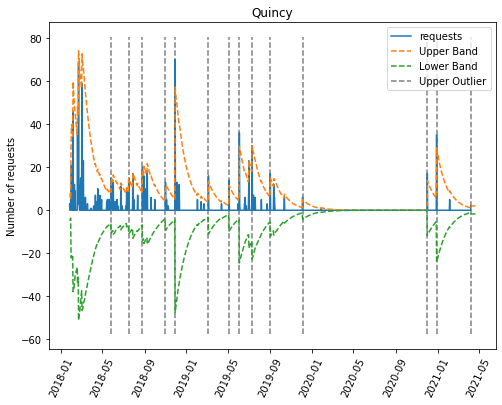

Quincy
                      s   midband         ub         lb
request_date_time                                      
2018-05-27         15.0  1.959876  14.566082 -10.646331
2018-07-17         15.0  1.932696  14.901048 -11.035656
2018-08-26         20.0  1.902068  18.105479 -14.301344
2018-11-01         13.0  0.990347  11.398459  -9.417766
2018-11-29         70.0  4.843207  57.264324 -47.577910
2019-03-06         16.0  1.228008  13.528024 -11.072008
2019-05-05         14.0  0.970310  11.611513  -9.670893
2019-06-04         36.0  2.602030  29.732598 -24.528538
2019-07-11         30.0  3.586224  29.942742 -22.770294
2019-09-02         17.0  1.416553  15.091375 -12.258269
2019-12-05          6.0  0.407903   5.048255  -4.232450
2020-12-02         17.0  1.096774  13.840139 -11.646590
2020-12-29         35.0  2.439239  29.068127 -24.189648
2021-04-08          2.0  0.137292   1.991486  -1.716903


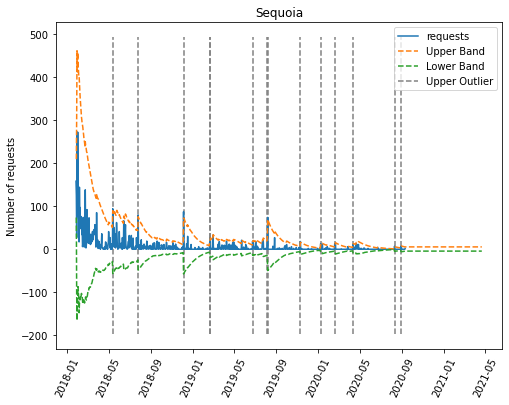

Sequoia
                      s    midband         ub         lb
request_date_time                                       
2018-05-13         94.0  16.485416  89.510807 -56.539976
2018-07-26         79.0  13.667107  75.493225 -48.159012
2018-12-05         87.0   7.246277  71.817767 -57.325213
2019-02-19         15.0   1.591873  14.603812 -11.420066
2019-02-21         27.0   3.617862  26.438956 -19.203233
2019-06-24         19.0   2.141659  18.169779 -13.886462
2019-08-06         36.0   5.162100  35.054045 -24.729845
2019-08-07         74.0   9.603255  68.752236 -49.545726
2019-11-10         18.0   1.874942  16.173358 -12.423475
2020-01-08         13.0   1.044963  10.968712  -8.878786
2020-02-18         13.0   1.280615  11.839597  -9.278368
2020-04-11         11.0   0.972434   9.909630  -7.964762
2020-08-10          7.0   0.467351   5.769399  -4.834696
2020-08-29          7.0   0.583236   6.478630  -5.312158


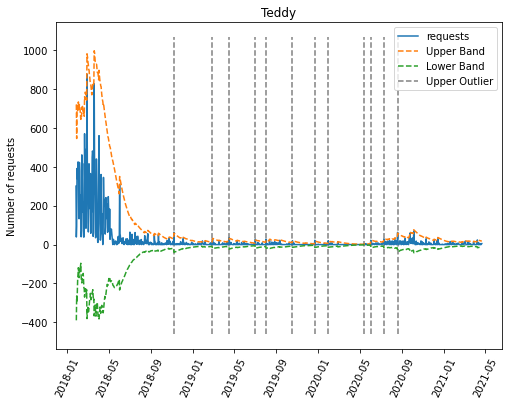

Teddy
                      s    midband         ub         lb
request_date_time                                       
2018-11-07         64.0   9.850141  59.502858 -39.802576
2019-02-27         29.0   3.539340  26.669556 -19.590876
2019-04-17         36.0   4.399957  32.484737 -23.684822
2019-07-02         28.0   2.542129  23.930195 -18.845936
2019-08-02         27.0   2.643340  24.626728 -19.340047
2019-10-18         20.0   2.338426  18.823031 -14.146179
2019-12-22         22.0   1.598879  18.278620 -15.080861
2020-01-30         20.0   1.582511  17.296160 -14.131138
2020-05-14          4.0   0.267540   3.455152  -2.920073
2020-06-02         22.0   1.963632  18.460222 -14.532957
2020-07-10         29.0   5.313579  27.671059 -17.043902
2020-08-19         63.0  11.672033  59.309079 -35.965012


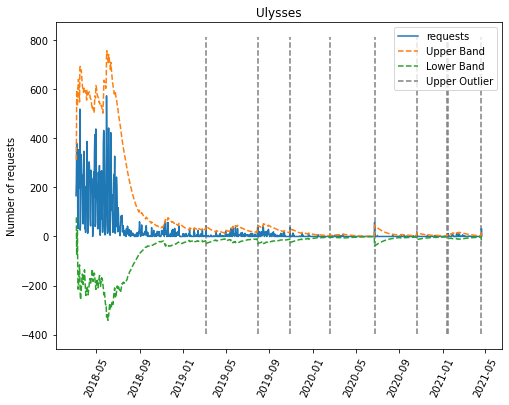

Ulysses
                      s   midband         ub         lb
request_date_time                                      
2019-03-06         43.0  6.997838  42.814925 -28.819250
2019-07-30         46.0  6.972344  43.346350 -29.401663
2019-10-29         36.0  3.940966  32.568879 -24.686947
2020-02-18          5.0  0.425348   4.897709  -4.047013
2020-06-23         57.0  3.685098  46.409978 -39.039782
2020-10-20         19.0  1.481811  15.777105 -12.813482
2021-01-14          8.0  0.817000   7.123421  -5.489421
2021-01-16         12.0  1.670236  11.957299  -8.616827
2021-04-20         32.0  2.217755  26.212173 -21.776663


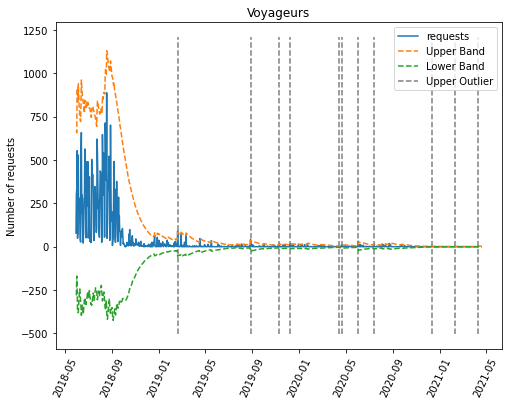

Voyageurs
                      s    midband         ub         lb
request_date_time                                       
2019-02-18         91.0  13.931316  82.898321 -55.035689
2019-08-27         41.0   3.910734  34.660759 -26.839290
2019-11-09         16.0   1.887083  15.351092 -11.576926
2019-12-09         17.0   2.278662  16.939867 -12.382543
2020-04-14          7.0   0.612115   6.562655  -5.338425
2020-04-21          9.0   0.964429   8.988280  -7.059421
2020-06-03         32.0   2.328025  26.362171 -21.706121
2020-07-13         17.0   1.728259  16.533494 -13.076977
2020-12-11          3.0   0.211933   2.710049  -2.286182
2021-02-10          2.0   0.132658   1.666525  -1.401208
2021-04-12          4.0   0.260334   3.264121  -2.743453


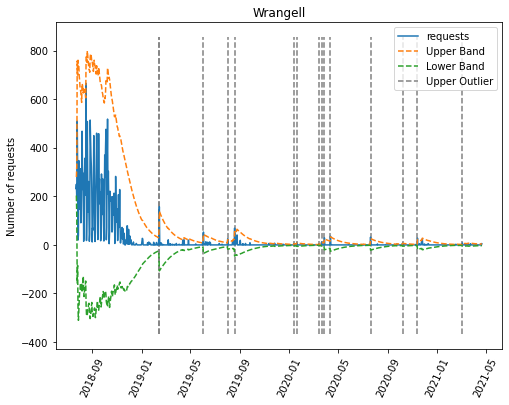

Wrangell
                       s    midband          ub          lb
request_date_time                                          
2019-02-13          57.0   5.941328   54.540280  -42.657624
2019-02-14         157.0  15.687059  138.290761 -106.916644
2019-06-03          53.0   4.261233   44.464495  -35.942029
2019-08-02          25.0   2.094764   21.893864  -17.704335
2019-08-19          69.0   7.079451   60.168508  -46.009605
2020-01-13           6.0   0.452303    5.222639   -4.318032
2020-01-20           8.0   0.799714    7.724322   -6.124893
2020-03-14           4.0   0.279887    3.497378   -2.937604
2020-03-21          12.0   0.995899   10.195913   -8.204115
2020-03-28          29.0   2.495377   24.990800  -20.000046
2020-04-12          36.0   3.542007   33.259358  -26.175344
2020-07-20          32.0   2.164379   26.124187  -21.795430
2020-10-07           7.0   0.601237    6.388015   -5.185541
2020-11-13          28.0   1.956250   22.938580  -19.026079
2021-03-04           8.0   0.59

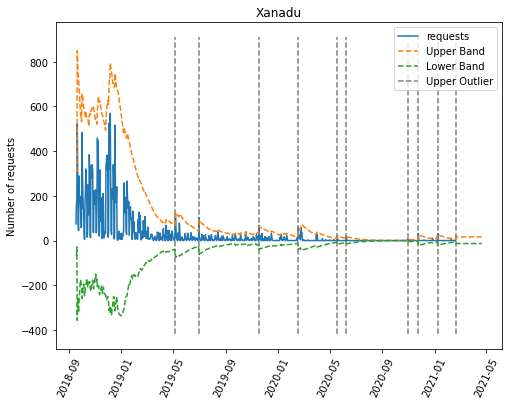

Xanadu
                       s    midband          ub         lb
request_date_time                                         
2019-05-07         118.0  21.826451  115.005976 -71.353074
2019-07-01         103.0  14.727456   92.585947 -63.131036
2019-11-18          68.0  11.108592   63.007755 -40.790570
2020-02-18          58.0   6.964166   53.330760 -39.402428
2020-05-19          22.0   1.980892   20.076048 -16.114264
2020-06-09          18.0   1.649519   17.742698 -14.443660
2020-10-30           7.0   0.451732    5.700858  -4.797395
2020-11-24          32.0   2.149785   26.183397 -21.883828
2021-01-08          31.0   2.526475   26.589420 -21.536469
2021-02-20          18.0   1.490739   16.343049 -13.361571


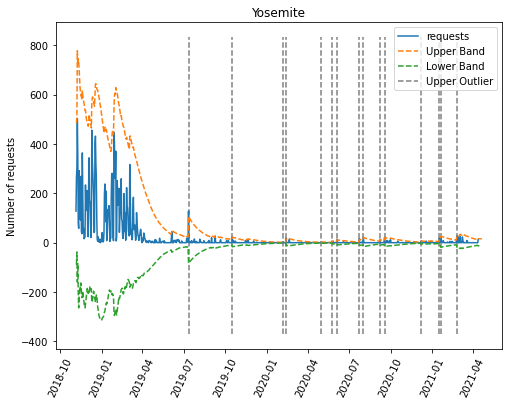

Yosemite
                       s    midband          ub         lb
request_date_time                                         
2019-07-12         128.0  11.784784  106.932918 -83.363350
2019-10-17          23.0   2.842050   22.223348 -16.539247
2020-02-06           3.0   0.214482    2.800460  -2.371495
2020-02-13          18.0   1.295767   14.839968 -12.248435
2020-05-01           3.0   0.208048    2.852019  -2.435922
2020-05-24           6.0   0.431971    5.066781  -4.202839
2020-06-05          13.0   1.245145   11.703291  -9.213000
2020-07-24          16.0   1.110936   13.294968 -11.073096
2020-08-02          22.0   2.416849   20.834408 -16.000710
2020-09-08          12.0   0.979118   11.512062  -9.553827
2020-09-18          22.0   2.404757   20.690612 -15.881099
2020-12-08           8.0   0.581926    6.893809  -5.729957
2021-01-17          18.0   1.478685   15.233979 -12.276609
2021-01-20          25.0   3.004520   24.637675 -18.628635
2021-02-25          27.0   3.367389   25.506936

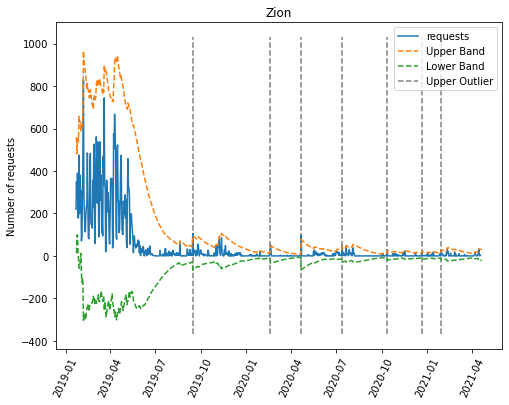

Zion
                       s    midband         ub         lb
request_date_time                                        
2019-09-15         106.0  14.144995  95.573060 -67.283070
2020-02-19          51.0   4.938035  43.816267 -33.940197
2020-04-21          96.0   6.441877  78.463412 -65.579657
2020-07-13          51.0   9.782123  48.730464 -29.166218
2020-10-12          29.0   2.912239  25.785425 -19.960946
2020-12-21          23.0   2.508675  21.883295 -16.865944
2021-01-29          28.0   3.671889  26.638918 -19.295139


In [24]:
for value in cohort_names:
    s = cohort_requests[value]
    # set the window span
    span = 30
    
    # compute midband
    midband = s.ewm(span=span).mean()
    
    # compute exponential stdev
    stdev = s.ewm(span=span).std()
    
    ub = midband + stdev*3
    lb = midband - stdev*3
    
    bb = pd.concat([ub, lb], axis=1)
    
    bb.columns = ['ub', 'lb']
    
    my_df = pd.concat([s, midband, bb], axis=1)
    my_df.columns = ['s', 'midband', 'ub', 'lb']
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(my_df.index, my_df.s, label='requests')
    
    #ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band', ls='--')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band', ls='--')
    
    plt.vlines(my_df[my_df.s > ub].index, *plt.ylim(), color='grey', ls='--', label='Upper Outlier')
    
    ax.legend(loc='best')
    ax.set_ylabel('Number of requests')
    plt.xticks(rotation = 65)
    plt.title(value)
    
    plt.show()
    
    print(value)
    print(my_df[my_df.s > ub])

In [25]:
# df['2020-04-30'].ip.value_counts()
# df['2020-01-14'].ip.value_counts()
df['2018-12-19'][df['2018-12-19'].user_id==313]



<ipython-input-25-fc47face48e5>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-12-19'][df['2018-12-19'].user_id==313]


,path,user_id,ip,name,start_date,end_date,created_at,updated_at,program,date_year,date_month,date_weekday,hour,url,lesson
request_date_time,,,,,,,,,,,,,,,
2018-12-19 09:48:41,java-iii,313,108.199.117.96,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,9,java-iii,no data
2018-12-19 09:48:43,java-iii/finish-the-adlister,313,108.199.117.96,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,9,java-iii,finish-the-adlister
2018-12-19 09:49:00,spring,313,108.199.117.96,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,9,spring,no data
2018-12-19 09:49:08,spring/setup,313,108.199.117.96,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,9,spring,setup
2018-12-19 09:49:17,spring/fundamentals/controllers,313,108.199.117.96,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,9,spring,fundamentals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19 21:56:26,slides/jdbc,313,173.173.121.126,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,21,slides,jdbc
2018-12-19 21:56:30,slides/user_input,313,173.173.121.126,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,21,slides,user_input
2018-12-19 21:56:34,slides/passwords,313,173.173.121.126,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018,December,Wednesday,21,slides,passwords


In [26]:
df['2020-09-21'].ip.value_counts().head(10)

<ipython-input-26-38352062956b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-09-21'].ip.value_counts().head(10)


99.76.233.212      147
72.181.127.233     112
173.174.200.226     77
24.243.67.104       68
96.8.130.201        65
76.201.20.193       52
173.174.165.12      51
70.125.137.220      50
67.11.85.236        45
162.197.239.66      36
Name: ip, dtype: int64

In [27]:
df['2020-04-30'].ip.value_counts().head(10)

<ipython-input-27-b2ea3abbf13a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-04-30'].ip.value_counts().head(10)


172.124.67.93      84
74.192.167.159     72
72.190.187.173     51
68.252.68.142      51
216.63.31.195      49
104.190.137.203    46
104.10.49.137      39
70.114.9.241       35
104.5.217.57       33
136.50.17.203      33
Name: ip, dtype: int64